# Lecture 8: Random Variables and Their Distributions


## Stat 110, Prof. Joe Blitzstein, Harvard University

----

## Two Basic Types of Random Variables

There are two basic types of random variables.

* _Discrete random variables_ are random variables whose values can be enumerated, such as $a_1, a_2, \dots , a_n$. Here, _discrete_ does not necessarily mean only integers. 

* _Continuous random variables_, on the other hand, can take on values in $\mathbb{R}$.

Note that there are other types that might mix the two definitions.


### Cumulative distribution function

Given $X \le x$ is an event, and a function $F(x) = P(X \le x)$.

Then $F$ is known as the __cumulative distribution function__ (CDF) of $X$. In contrast with the probability mass function, the CDF is more general, and is applicable for both discrete and continuous random variables.

![title](images/L0801.png)

### Probability mass function

The __probability mass function__ (PMF) is $P(X=a_j)$, for all $\text{j}$. A pmf must satisfy the following conditions:

\begin{align}
  P_j &\ge 0 \\
  \sum_j P_j &= 1
\end{align}

![title](images/L0802.png)

In practice, using a PMF is easier than a CDF, but a PMF is only applicable in the case of __discrete random variables__ only.

----

## Revisiting the Binomial Distribution $Bin(n,p)$

$X \sim Bin(n, p)$, where

* $n$ is an integer greater than 0
* $p$ is between 0.0 and 1.0

Here are a few different ways to explain the Binomial distribution.

### Explanation with a story

$X$ is the number of successes in $n$ _independent_ $Bern(p)$ trials.

### Explanation using sum of indicator random variables

\begin{align}
  &X = X_1 + X_2 + \dots + X_j 
  & &\text{where } X_j =
  \begin{cases}
    1, &\text{if } j^{\text{th}} \text{ trial succeeds} \\
    0, &\text{ otherwise }
  \end{cases} \\
  & & &\text{and } X_1, X_2, \dots , X_j \text{ are i.i.d Bern(n,p)}
\end{align}

### Explanation using a probability mass function

\begin{align}
  P(X=k) = \binom{n}{k} p^k q^{n-k} \text{, where } q = 1 - p \text{ and } k \in \{0,1,2, \dots ,n\}
\end{align}

A probability mass function sums to 1. Note that

\begin{align}
  \sum_{k=0}^n \binom{n}{k} p^k q^{n-k} &= (p + q)^n & &\text{by the Binomial Theorem} \\
  &= (p + 1 - p)^n \\
  &= 1^n \\
  &= 1
\end{align}
so the explanation by PMF holds. By the way, it is this relation to the [Binomial Theorem](https://en.wikipedia.org/wiki/Binomial_theorem) that this distribution gets its name.

----

## Sum of Two Binomial Random Variables

Recall that we left Lecture 7 with this parting thought:
    
\begin{align}
    & X \sim \text{Bin}(n,p) \text{, } Y \sim \text{Bin}(m,p) \rightarrow X+Y \sim \text{Bin}(n+m, p)
\end{align}

Let's see how this is true by using the three explanation approaches we used earlier.

### Explanation with a story

$X$ and $Y$ are functions, and since they both have the same sample space $S$ and the same domain. 

$X$ is the number of successes in $n \text{ Bern}(p)$ trials.

$Y$ is the number of successes in $m \text{ Bern}(p)$ trials.

$\therefore X + Y$ is simply the sum of successes in $n+m \text{ Bern}(p)$ trials.

### Explanation using a sum of indicator random variables

\begin{align}
    &X = X_1 + X_2 + \dots + X_n, ~~~~ Y = Y_1 + Y_2 + \dots + Y_m \\
    &\Rightarrow X+Y = \sum_{i=1}^n X_j + \sum_{j=1}^m Y_j \text{, which is } n + m \text{ i.i.d. Bern}(p) \\
    &\Rightarrow \text{Bin}(n + m, p)
\end{align}

### Explanation using a probability mass function

We start with a PMF of the _convolution_ $X+Y=k$

\begin{align}
    P(X+Y=k) &= \sum_{j=0}^k P(X+Y=k|X=j)P(X=j) & &\text{wishful thinking, assume we know } x \text{ and apply LOTP} \\
    &= \sum_{j=0}^k P(Y=k-j|X=j) \binom{n}{j} p^j q^{n-j} & &\text{... but since events }Y=k-j \text{ and } X=j \text{ are independent}\\
    &= \sum_{j=0}^k P(Y=k-j) \binom{n}{j} p^j q^{n-j} & &P(Y=k-j|X=j) = P(Y=k-j) \\
    &= \sum_{j=0}^k \binom{m}{k-j} p^{k-j} q^{m-k+j}~~~ \binom{n}{j} p^j q^{n-j} \\
    &= p^k q^{m+n-k} \underbrace{\sum_{j=0}^k \binom{m}{k-j}\binom{n}{j}}_{\text{Vandermonde's Identity}} & &\text{see Lecture 2, Story Proofs, Ex.3} \\
    &= \binom{m+n}{k} p^k q^{m+n-k} ~~~~ \blacksquare
\end{align}

----

## Hypergeometric Distribution

A common mistake in trying to use the Binomial distribution is forgetting that

* the trials are independent
* they have the same probability of success

#### Example: How Many Aces in a 5-card Hand?

A 5-card hand out of a standard 52-card deck of playing cards, what is the the distribution (PMF or CDF) of the number of aces.

Let $X = (\text{# of aces})$.

Find $P(X=k)$ where $x \in \text{\{0,1,2,3,4\}}$. At this point, we can conclude that the distribution is __not__ Binomial, _as the trials are not independent_.

The PMF is given by
\begin{align}
   P(X=k) &= \frac{\binom{4}{k}\binom{48}{5-k}}{\binom{52}{5}}
\end{align}


#### Example: Sampling White/Black Marbles

Suppose we have a total of $b$ black and $w$ white marbles. Pick a random sample of $n$ marbles. What is the distribution on the # white marbles?

\begin{align}
    P(X=k) &= \frac{\binom{w}{k}\binom{b}{n-k}}{\binom{w+b}{n}}
\end{align}

The distribution in the examples above is called the __Hypergeometric distribution__. In the hypergeometric distribution, we sample _without replacement_, and so the trials cannot be independent.

Note that when the total number of items in our sample is exceedingly large, it becomes highly unlikely that we would choose the same item _more than once_. Therefore, it doesn't matter if you are sampling with replacement or without, suggesting that in this case the hypergeometric behaves as the binomial.

#### Is the Hypergeometric distribution a valid PMF?

_Is the hypergeometric non-negative?_

Yes, obviously.

_Does the PMF sum to 1?_

\begin{align}
    P(X=k) &=  \sum_{k=0}^w \frac{\binom{w}{k}\binom{b}{n-k}}{\binom{w+b}{n}} \\
    &= \frac{1}{\binom{w+b}{n}} \sum_{k=0}^w \binom{w}{k}\binom{b}{n-k} & &\text{since }\binom{w+b}{n} \text{ is constant} \\
    &= \frac{1}{\binom{w+b}{n}} \binom{w+b}{n} & &\text{by Vandermonde's Identity } \\
    &= 1 ~~~~ \blacksquare
\end{align}

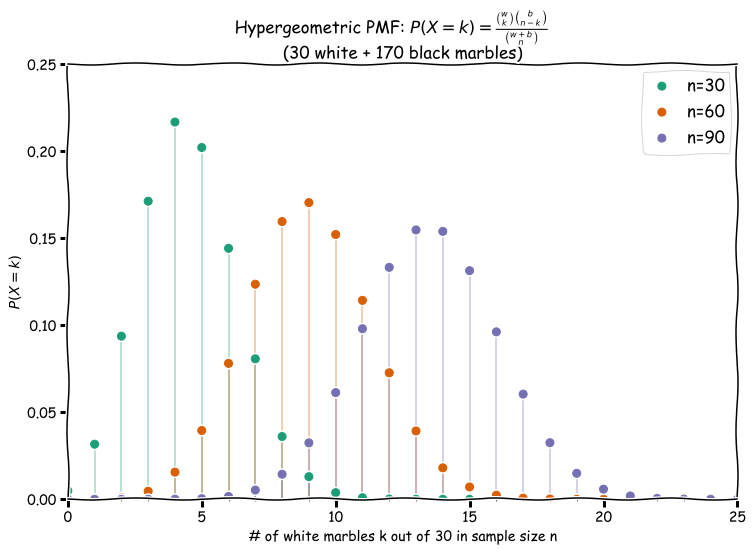

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.stats import hypergeom

%matplotlib inline

plt.xkcd()
_, ax = plt.subplots(figsize=(12,8))

# seme Hypergeometric parameters
# population and # white marbles are fixed
population_sizes = [200, 200, 200]
w_marbles = [30, 30, 30]
# let sample size n vary
sample_sizes = [30, 60, 90]
params = list(zip(population_sizes, w_marbles, sample_sizes))

# colorblind-safe, qualitative color scheme
colors = ['#1b9e77', '#d95f02', '#7570b3']

for i,(N,w,n) in enumerate(params):
    rv = hypergeom(N, w, n)
    x = np.arange(0, w+1)
    pmf_w = rv.pmf(x)
    ax.plot(x, pmf_w, 'o', ms=8, color=colors[i], label='n={}'.format(n))
    ax.vlines(x, 0, pmf_w, lw=2, color=colors[i], alpha=0.3)

# legend styling
legend = ax.legend()
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)

# y-axis
ax.set_ylim([0.0, 0.25])
ax.set_ylabel(r'$P(X=k)$')

# x-axis
ax.set_xlim([0, 25])
ax.set_xlabel('# of white marbles k out of {} in sample size n'.format(w))

# x-axis tick formatting
majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)

plt.suptitle(r'Hypergeometric PMF: $P(X=k) = \frac{\binom{w}{k}\binom{b}{n-k}}{\binom{w+b}{n}}$')
plt.title(r'({} white + {} black marbles)'.format(w, N-w))

plt.show()

----

## Appendix A: Independent, Identically Distributed

A sequence of random variables are independent and identically distributed (i.i.d) if each r.v. has the same probability distribution and all are mutually independent.

Think of the Binomial distribution where we consider a string of coin flips. The probability $p$ for head's is the *same across all coin flips*, and seeing a head (or tail) in a previous toss *does not affect any of the coin flips that come afterwards*.

----